In [15]:
#!pip uninstall eodal -y
#!pip install git+https://github.com/lukasValentin/eodal.git@landsat-dev

In [16]:
#import what is needed
from datetime import datetime
from pathlib import Path
from shapely.geometry import box

from eodal.config import get_settings
from eodal.core.sensors import Landsat
from eodal.mapper.feature import Feature
from eodal.mapper.filter import Filter
from eodal.mapper.mapper import Mapper, MapperConfigs

Settings = get_settings()
# we use STAC, i.e., Microsoft Planetary Computer
Settings.USE_STAC = True

# user-inputs
# -------------------------- Collection -------------------------------
collection = 'landsat-c2-l2'

# ---------------------- Spatial Feature  ------------------------------
bbox = box(*[30.2825, 0.4019, 30.3714, 0.4643])  #WRS2: 173_60 (can be also shp, gpkg, etc.)
feature = Feature(
    name='landsat-test',
    geometry=bbox,
    epsg=4326,
    attributes={})

# ------------------------- Time Range ---------------------------------
time_start = datetime(1970, 1, 1)
time_end = datetime(2023, 6, 15)

# ------------------------- Metadata Filters ---------------------------
metadata_filters = [
    Filter('eo:cloud_cover', '<', 20),
    Filter('landsat:wrs_path', '==', '173'),
    Filter('landsat:wrs_row', '==', '060')
]

# set up the Mapper configuration
mapper_configs = MapperConfigs(
    metadata_filters=metadata_filters,
    collection=collection,
    feature=feature,
    time_start=time_start,
    time_end=time_end)

# get a new mapper instance
mapper = Mapper(mapper_configs)

# query the scenes available (no I/O of scenes, this only fetches metadata)
mapper.query_scenes()

# we tell EOdal how to load the Landsat scenes using `Landsat.from_usgs`
# and pass on some kwargs, e.g., the selection of bands we want to read.
scene_kwargs = {
    'scene_constructor': Landsat.from_usgs,
    'scene_constructor_kwargs': {'band_selection': ['blue', 'green', 'red', 'nir08', 'swir16'], 
                                 'read_qa': False} 
    }

# now we load the scenes
mapper.load_scenes(scene_kwargs=scene_kwargs)


2023-06-15 17:19:00,066 eodal        INFO     Starting extraction of landsat scenes
2023-06-15 17:20:40,760 eodal        INFO     Finished extraction of landsat scenes


In [17]:
for scene_id, scene in mapper.data:
    print(scene_id)
print(len(mapper.data))

2016-06-19 00:00:00
2016-06-27 00:00:00
2016-07-13 00:00:00
2016-08-30 00:00:00
2016-10-09 00:00:00
2016-11-26 00:00:00
2017-01-05 00:00:00
2017-01-13 00:00:00
2017-01-21 00:00:00
2017-05-21 00:00:00
2017-06-06 00:00:00
2018-02-01 00:00:00
2018-06-17 00:00:00
2018-07-03 00:00:00
2018-12-26 00:00:00
2019-01-03 00:00:00
2019-01-11 00:00:00
2019-02-04 00:00:00
2019-03-08 00:00:00
2019-05-03 00:00:00
2019-06-20 00:00:00
2019-07-14 00:00:00
2019-07-30 00:00:00
2019-12-29 00:00:00
2020-01-14 00:00:00
2020-02-07 00:00:00
2020-06-06 00:00:00
2020-08-01 00:00:00
2020-09-10 00:00:00
2020-12-15 00:00:00
2021-02-09 00:00:00
2021-03-29 00:00:00
2021-04-14 00:00:00
2021-05-16 00:00:00
2021-06-09 00:00:00
2021-07-03 00:00:00
2021-08-28 00:00:00
2021-10-23 00:00:00
2021-10-31 00:00:00
2022-03-24 00:00:00
2022-04-01 00:00:00
2022-04-09 00:00:00
2022-05-19 00:00:00
2022-06-04 00:00:00
2022-06-28 00:00:00
2022-07-06 00:00:00
2022-07-14 00:00:00
2022-07-22 00:00:00
2022-09-08 00:00:00
2022-10-02 00:00:00


C:\Users\finnt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\eodal\core\scene.py:634: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  f.tight_layout()


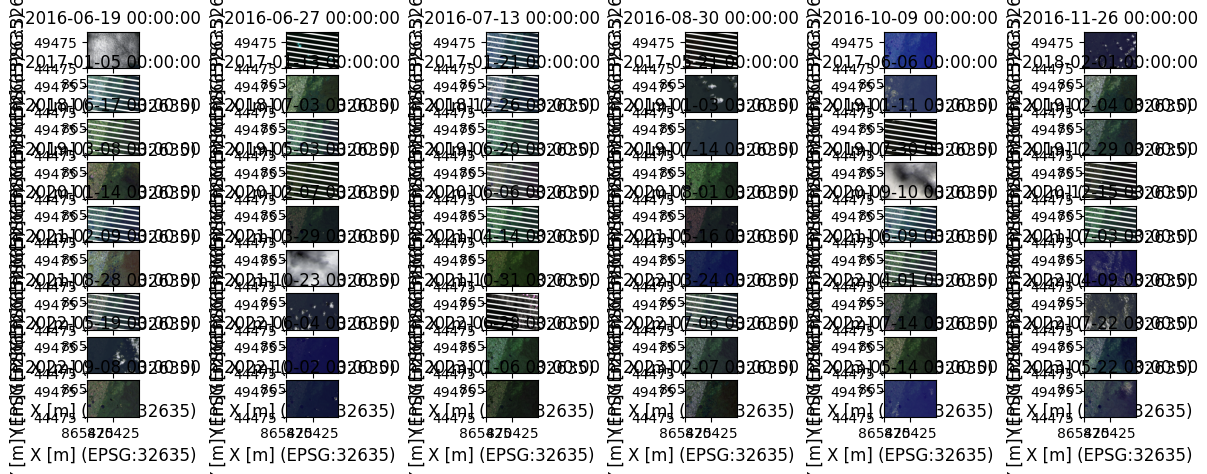

In [18]:
# the scenes can be plotted
f_scenes = mapper.data.plot(['red','green','blue'], figsize=(15,5))

In [19]:
# make the SceneCollection obtained persistent so that we do not have to re-run
# the STAC query all the time we use the data.
fpath = Path('S:\MSc_23_TimckeFinn\data\EOdal\data_test.pkl') #need to be adjusted to your drive letter
with open(fpath, 'wb+') as dst:
    dst.write(mapper.data.to_pickle())
